
TFDeepSurv: Deep Cox proportional risk model and survival analysis implemented by tensorflow.

1. Differences from DeepSurv

DeepSurv, a package of Deep Cox proportional risk model, is open-source on Github. But our works may shine in:

    Evaluating variable importance in deep neural network.
    Identifying ties of death time in your survival data, which means different loss function and estimator for survival function (Breslow or Efron approximation).
    Providing survival function estimated by three optional algorithm.
    Tuning hyperparameters of DNN using scientific method - Bayesian Hyperparameters Optimization.

2. http://localhost:8888/notebooks/TFDeepSurv_Testing.ipynb#

The project is based on the research of Breast Cancer. The paper about this project has been submitted to IEEE JBHI. We will update status here once paper published !
3. Installation

From source
Download TFDeepSurv package and install from the directory (Python version : 3.x):

git clone https://github.com/liupei101/TFDeepSurv.git
cd TFDeepSurv
pip install .


4. Get it started:
4.1 Runing with simulated data
4.1.1 import packages and prepare data
https://github.com/liupei101/TFDeepSurv

In [1]:
import deepsurv
from lifelines import KaplanMeierFitter
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
#import pandas as pd
from matplotlib import pyplot
data = read_csv('lung.csv',index_col=0) #, , parse_dates=True, squeeze=True)
#data_cox = pd.read_csv("lung.csv")
#data =  data.drop(["Unnamed: 0"],axis=1)
#data_cox.hist()
#pyplot.show()
data.head()

PyTorch version 1.6.0 available.


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [2]:
# Print the column names of the dataset
data.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

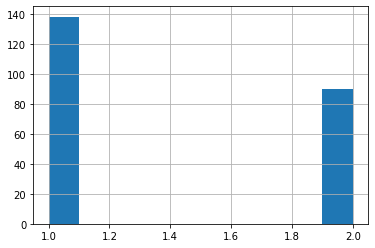

In [3]:
data['sex'].hist()

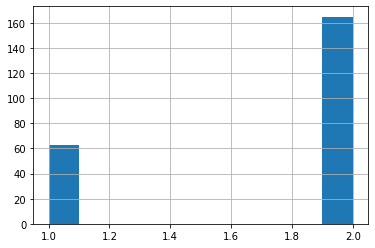

In [4]:
data['status'].hist()

In [5]:
# Cleaning the data :
data_cox = data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])
print (data_cox.head())

   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
2   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
4   5.0   210       2   57    1      1.0      90.0       60.0    1150.0   
6  12.0  1022       1   74    1      1.0      50.0       80.0     513.0   
7   7.0   310       2   68    2      2.0      70.0       60.0     384.0   
8  11.0   361       2   71    2      2.0      60.0       80.0     538.0   

   wt.loss  
2     15.0  
4     11.0  
6      0.0  
7     10.0  
8      1.0  


In [6]:
# Create the object for our method
kmf = KaplanMeierFitter()

In [7]:
data_cox.loc[data_cox.status == 1,'dead'] = 0
data_cox.loc[data_cox.status == 2,'dead'] = 1
data_cox.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


In [8]:
T = data_cox["time"]
E = data_cox["dead"]

kmf.fit(T, event_observed=E)
#import tfdeepsurv

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

In [9]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


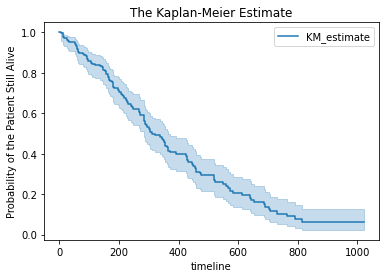

In [10]:
kmf.plot()
plt.title('The Kaplan-Meier Estimate')
plt.ylabel('Probability of the Patient Still Alive')
plt.show()

In [11]:
kmf.confidence_interval_[0:30]

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.958259,0.999154
11.0,0.952967,0.996991
12.0,0.945344,0.994171
13.0,0.937446,0.990942
15.0,0.929570,0.987428
26.0,0.921781,0.983697
30.0,0.914092,0.979794


In [12]:
# Probability of an individual to die
kmf.cumulative_density_[0:50]

,KM_estimate
timeline,
0.0,0.000000
5.0,0.005988
11.0,0.011976
12.0,0.017964
13.0,0.023952
15.0,0.029940
26.0,0.035928
30.0,0.041916
31.0,0.047904


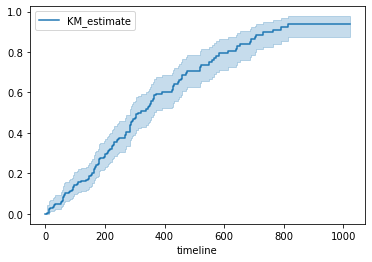

In [13]:
kmf.plot_cumulative_density()

##Hazard function##:

The survival functions are a great way to summarize and visualize the survival dataset. However, it is not the only way. If we are curious about the hazard function h(t) of a population, we, unfortunately, can’t transform the Kaplan Meier estimate. For that, we use the Nelson-Aalen Hazard Function:

$$\hat{H}(t) = \sum_{t_i \le t}{\frac{d_i}{n_i}}$$

Where $d_i$ = number of deaths at time $t_i$ and $n_i$ = number of patients at the start.

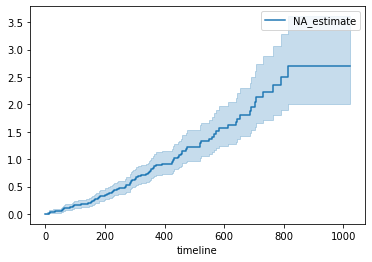

In [14]:
# Hazard Function
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)
naf.plot_cumulative_hazard()

In [15]:
# We can predict the value of a certain point :
print (naf.predict(1022).round(3))

2.695


/opt/anaconda3/lib/python3.8/site-packages/lifelines/utils/__init__.py:1111: ConvergenceWarning: Column status have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['dead'].astype(bool)
>>> print(df.loc[events, 'status'].var())
>>> print(df.loc[~events, 'status'].var())

A very low variance means that the column status completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1262: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.451. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -451.75
         time fit was run = 2020-10-07 03:04:18 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.01       0.99       0.01            -0.04             0.01                 0.96                 1.01
status     19.39   2.63e+08    2164.78         -4223.51          4262.29                 0.00                  inf
age         0.00       1.00       0.01            -0.03             0.03                 0.98                 1.03
sex        -0.28       0.76       0.21            -0.69             0.13                 0.50                 1.14
ph.ecog     0.35       1.41       0.26            -0.16             0.86                 0.85                 2.36
ph.karno    0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01

              z    p   -log2(p)
covariate                      
inst      -1.05 0.29       1.78
status     0.01 0.99       0.01
age        0.05 0.96       0.05
sex       -1.33 0.18       2.45
ph.ecog    1.33 0.18       2.45
ph.karno   0.40 0.69       0.54
pat.karno -1.13 0.26       1.94
meal.cal  -1.19 0.23       2.10
wt.loss   -1.25 0.21       2.25
---
Concordance = 0.74
Partial AIC = 921.49
log-likelihood ratio test = 112.74 on 9 df
-log2(p) of ll-ratio test = 64.42

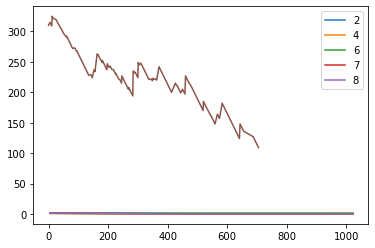

In [16]:
# Cox regression :
from lifelines import CoxPHFitter
#data = data_cox[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

cph = CoxPHFitter()

cph.fit(data_cox,"time",event_col="dead")
cph.print_summary()

# Plot the survival function :
d_data = data_cox.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

# It represents median time of survival :
CTE = kmf.conditional_time_to_event_
plt.plot(CTE)

https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html

https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-2.html

https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html

https://towardsdatascience.com/deep-learning-for-survival-analysis-fdd1505293c9

In [37]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris_X[0:10], iris_y[0:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
#import sklearn.model_selection as mod_sel
from sklearn.ensemble import RandomForestClassifier

from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
#import sklearn.model_selection as prep

rstate = 124
# Split the data into train/test subsets
#X_rf, y_rf = get_x_y_survival(data_cox, 'time', 'dead', 1)
X_rf = np.array(data_cox['time'])
y_rf = np.array(data_cox['dead'])
#X_rf[0:10], y_rf[0:10]
#print(X_rf[0:10])
#print(y_rf[0:10])
#X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.25, random_state=rstate)
#'''
rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=7,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=rstate,
                           verbose=1)

rsf.fit(X_rf_train, y_rf_train)
#'''


ValueError: y must be a structured array with the first field being a binary class event indicator and the second field the time of the event/censoring

In [ ]:
data_ds = data_cox.copy()
df_train = data_ds.copy()

df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

cols_stand = ['balance_time', 'LTV_time', 'origination_time', 'maturity_time',
       'interest_rate_time', 'house_price_index_time', 'gdp_time', 'unemployment_rate_time',
       'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'interest_rate_orig_time', 'house_price_index_orig_time']

cols_leave = ['investor_orig_time', 'real_estate_condominium',
       'real_estate_planned_urban_dev', 'real_estate_single_family_home', 'total_obs_time', 'default_time']

#standardize = [([col], StandardScaler) for col in cols_stand]

standardize = [([col], None) for col in cols_stand]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

## DeepSurv/Non-Linear model ##

The NonLinear CoxPH model was popularized by Katzman et al. in DeepSurv: Personalized Treatment Recommender System Using A Cox Proportional Hazards Deep Neural Network by allowing the use of Neural Networks within the original design and therefore introducing more modeling flexibility. 

Let's now take a look at how to use the NonLinear CoxPH model on a simulation dataset generated from a parametric model.

https://square.github.io/pysurvival/models/nonlinear_coxph.html

The easiest way to install scikit-survival is to use Anaconda by running:

conda install -c sebp scikit-survival

https://pypi.org/project/scikit-survival/

## To Do Task ##
Revise the following to test model the Lung Dataset.

In [47]:
#### 1 - Importing packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pysurvival.models.simulations import SimulationModel
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
#%pylab inline

#### 2 - Generating the dataset from a nonlinear Weibull parametric model
# Initializing the simulation model
sim = SimulationModel( survival_distribution = 'weibull',
                       risk_type = 'gaussian',
                       censored_parameter = 2.1,
                       alpha = 0.1, beta=3.2 )

# Generating N random samples 
N = 1000
dataset = sim.generate_data(num_samples = N, num_features=3)

# Showing a few data-points 
dataset.head(2)

Number of data-points: 1000 - Number of events: 520.0


,x_1,x_2,x_3,time,event
0,107.0,5.280426,8.381791,1.370118,1.0
1,122.0,7.527618,9.890272,2.172583,1.0


In [ ]:
from pysurvival.utils.display import display_baseline_simulations
display_baseline_simulations(sim, figure_size=(10, 5))

In [50]:
print(data_cox.shape)

(167, 11)


features =  ['x_1', 'x_2', 'x_3']


% Completion: 100%|**********************************************|Loss: 2134.96


C-index: 0.52


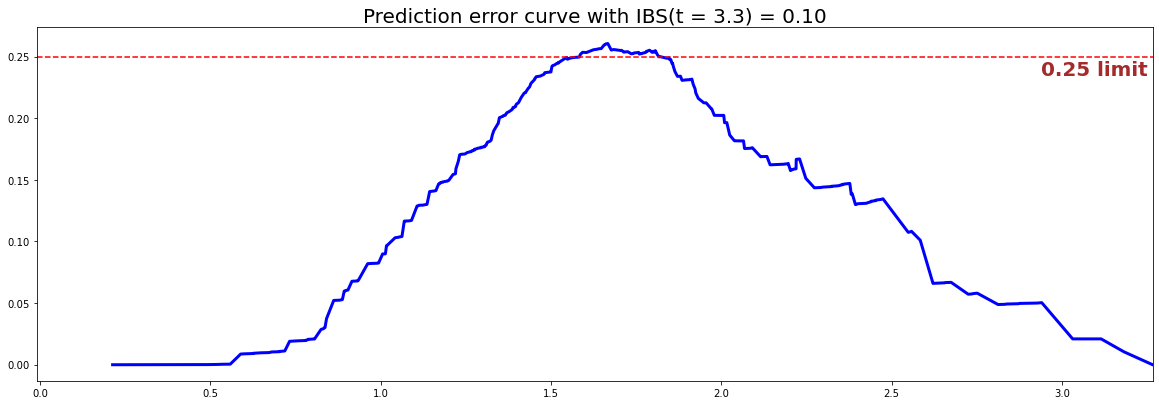

IBS: 0.10


In [49]:
#### 3 - Creating the modeling dataset
# Defining the features

N = data_cox.shape[0]

features = sim.features
print('features = ', features)
# Building training and testing sets #
index_train, index_test = train_test_split( range(N), test_size = 0.2)
data_train = dataset.loc[index_train].reset_index( drop = True )
data_test  = dataset.loc[index_test].reset_index( drop = True )

# Creating the X, T and E input
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train['time'].values, data_test['time'].values
E_train, E_test = data_train['event'].values, data_test['event'].values


#### 4 - Creating an instance of the NonLinear CoxPH model and fitting the data.

# Defining the MLP structure. Here we will build a 1-hidden layer 
# with 150 units and `BentIdentity` as its activation function
structure = [ {'activation': 'BentIdentity', 'num_units': 150},  ]

# Building the model
nonlinear_coxph = NonLinearCoxPHModel(structure=structure)
nonlinear_coxph.fit(X_train, T_train, E_train, lr=1e-3, init_method='xav_uniform')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(nonlinear_coxph, X_test, T_test, E_test) #0.81
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(nonlinear_coxph, X_test, T_test, E_test, t_max=10,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

We can see that the c-index is well above 0.5 and that the Prediction error curve is below the 0.25 limit, thus the model yields great performances. thus the model is likely to yield great performances.

We can show this by randomly selecting datapoints and comparing the actual and predicted survival functions, computed by the simulation model and the Nonlinear CoxPH respectively.

In [ ]:
#### 6 - Comparing actual and predictions
# Initializing the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Randomly extracting a data-point that experienced an event 
choices = np.argwhere((E_test==1.)&(T_test>=1)).flatten()
k = np.random.choice( choices, 1)[0]

# Saving the time of event
t = T_test[k]

# Computing the Survival function for all times t
predicted = nonlinear_coxph.predict_survival(X_test.values[k, :]).flatten()
actual = sim.predict_survival(X_test.values[k, :]).flatten()


# Displaying the functions
plt.plot(nonlinear_coxph.times, predicted, color='blue', label='predicted', lw=2)
plt.plot(sim.times, actual, color = 'red', label='actual', lw=2)

# Actual time
plt.axvline(x=t, color='black', ls ='--')
ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5), xytext=(t, 0.5), fontsize=12)

# Show everything
title = "Comparing Survival functions between Actual and Predicted"
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

4.1.2 Visualize survival status

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

### Visualize survival status
fig, ax = plt.subplots(figsize=(8, 6))

l_kmf = []
# training set
kmf = KaplanMeierFitter()
kmf.fit(train_data['t'], event_observed=train_data['e'], label='Training Set')
kmf.survival_function_.plot(ax=ax)
l_kmf.append(kmf)
# test set
kmf = KaplanMeierFitter()
kmf.fit(test_data['t'], event_observed=test_data['e'], label='Test Set')
kmf.survival_function_.plot(ax=ax)
l_kmf.append(kmf)

# 
plt.ylim(0, 1.01)
plt.xlabel("Time")
plt.ylabel("Survival rate")
plt.title("Survival Curve")
plt.legend(loc="best", title="Dataset")
add_at_risk_counts(*l_kmf, ax=ax)
plt.show()

4.1.3 Initialize your neural network

In [ ]:
input_nodes = 10
output_nodes = 1
train_X = train_data['x']
train_y = {'e': train_data['e'], 't': train_data['t']}
# the arguments of dsnn is obtained by Bayesian Hyperparameters Tuning
model = dsl.dsnn(
    train_X, train_y,
    input_nodes, [6, 3], output_nodes, 
    learning_rate=0.7,
    learning_rate_decay=1.0,
    activation='relu', 
    L1_reg=3.4e-5, 
    L2_reg=8.8e-5, 
    optimizer='adam',
    dropout_keep_prob=1.0
)
# Get the type of ties (three types)
# 'noties', 'breslow' when ties occur or 'efron' when ties occur frequently
print(model.get_ties())

4.1.4 Train neural network model

You can train dsnn via two optional functions:

    Only for training: model.train(). Refer to #section 4.1.4.a
    For training model and watch the learning curve: model.learn(). Refer to #section 4.1.4.b

4.1.4.a Training via model.train()

In [ ]:
# Plot curve of loss and CI on train data
model.train(num_epoch=1900, iteration=100,
            plot_train_loss=True, plot_train_ci=True)

4.1.4.b Training via model.learn()

NOTE: the function will firstly clean the running state and then train the model from zero.

In [ ]:
test_X = test_data['x']
test_y = {'e': test_data['e'], 't': test_data['t']}
# Plot learning curves on watch_list
watch_list = {"trainset": [train_X, train_y], "testset": [test_X, test_y]}
model.learn(num_epoch=1900, iteration=100, eval_list=watch_list,
            plot_ci=True)

4.1.5 Evaluate model performance

In [ ]:
test_X = test_data['x']
test_y = {'e': test_data['e'], 't': test_data['t']}
print("CI on train set: %g" % model.score(train_X, train_y))
print("CI on test set: %g" % model.score(test_X, test_y))

4.1.6 Evaluate variable importance

In [ ]:
model.get_vip_byweights()

4.1.7 Get estimation of survival function

In [ ]:
# optional algo: 'wwe', 'bls' or 'kp', the algorithm for estimating survival function
model.survival_function(test_X[0:3], algo="wwe")

4.2 Runing with real-world data

The procedure on real-world data is similar with the described on simulated data. One we need to notice is data preparation. This package provides functions for loading standard dataset for traning or testing.
4.2.1 load real-world data

4.2.2 Traning or testing tfdeepsurv model

This is the same as doing in simulated data.

5. More properties

We provide tools for hyperparameters tuning (Bayesian Hyperparameters Optimization) in deep neural network, which is automatic in searching optimal hyperparameters of DNN.

For more usage of Bayesian Hyperparameters Optimization, you can refer to here